# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


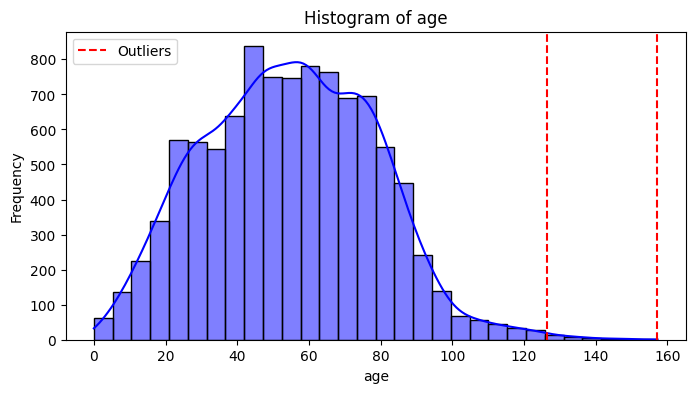

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3462
           1       0.97      0.99      0.98      3526

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1506
           1       0.93      0.99      0.96      1490

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4999
           1       0.96      0.99      0.98      4985

    accuracy                           0.97      9984


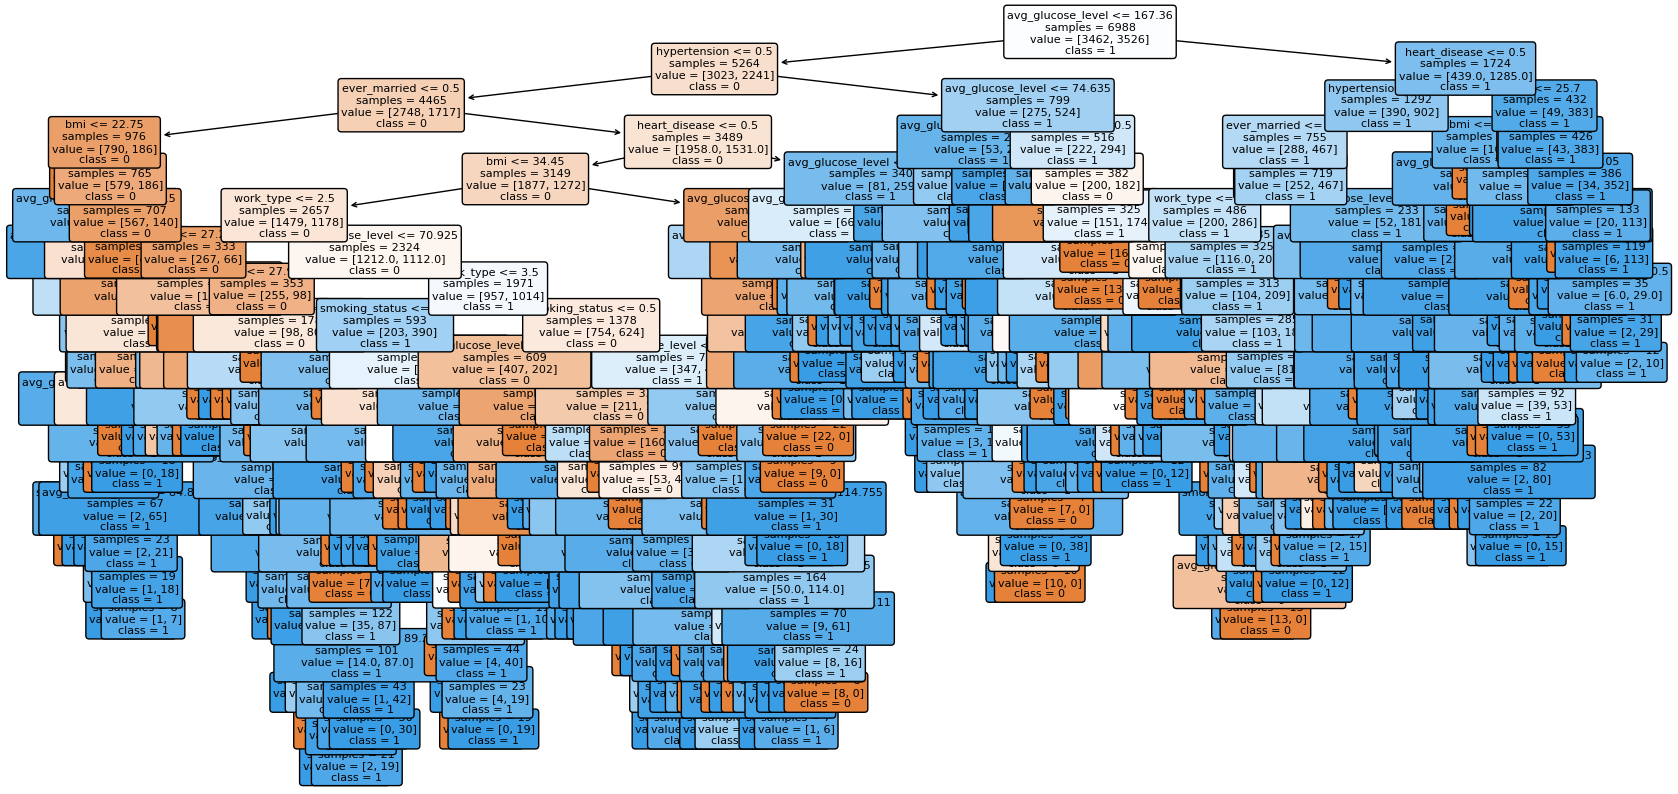

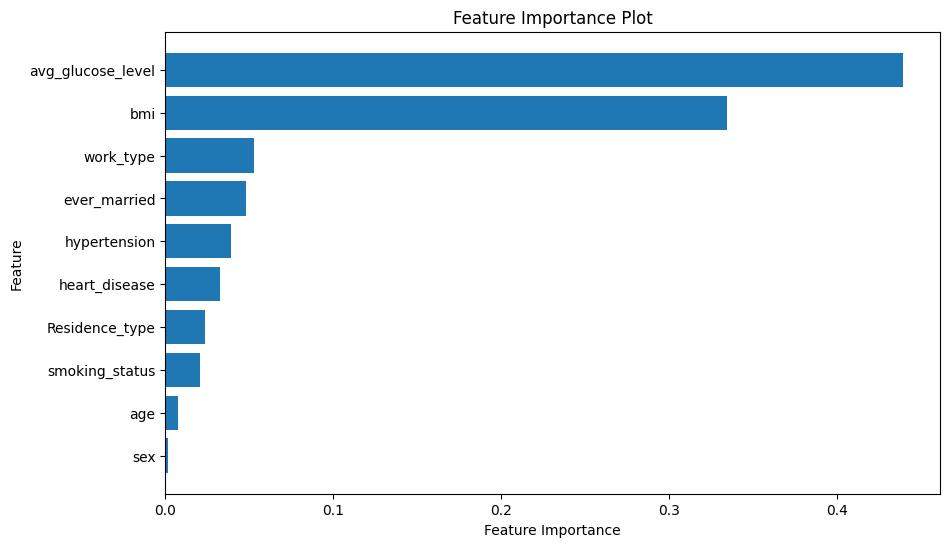

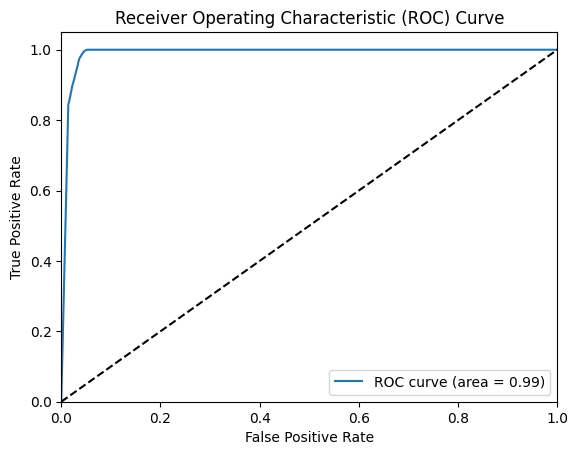

AUC Score: 0.9896860415212431


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9685264663805436, 0.9456366237482118, 0.9456366237482118, 0.949928469241774, 0.9570815450643777, 0.9628040057224606, 0.9356223175965666, 0.9556509298998569, 0.9441260744985673, 0.9412607449856734]
Mean accuracy: 0.9506273800886242
95% confidence interval: (0.9433126976246001, 0.9579420625526484)


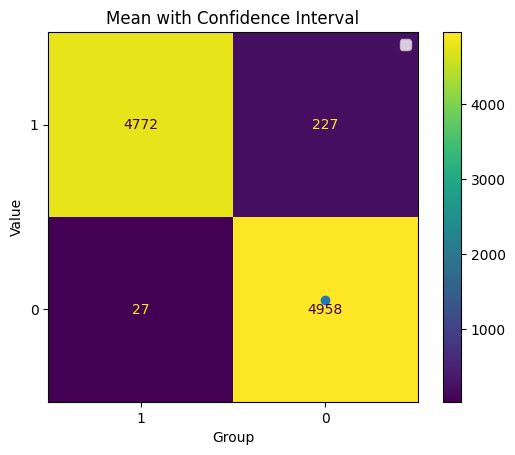

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)


**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 39.252968072891235
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 7, 'max_iter': 426, 'min_samples_leaf': 1}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      3526

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1506
           1       0.98      1.00      0.99      1490

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996


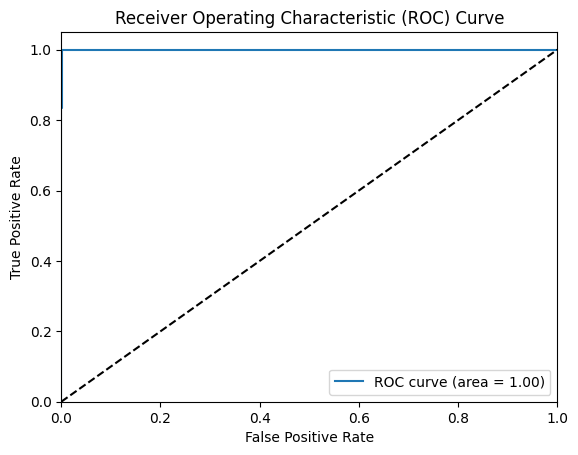

AUC Score: 0.9996683790118105


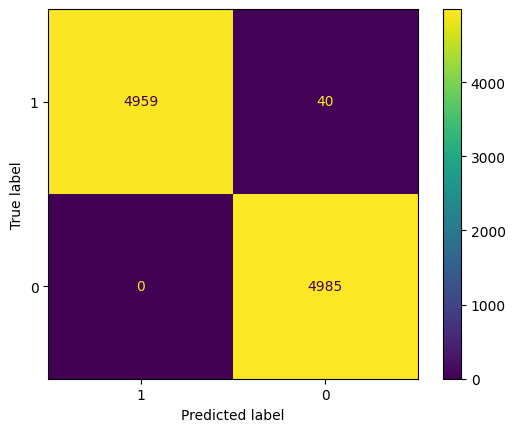

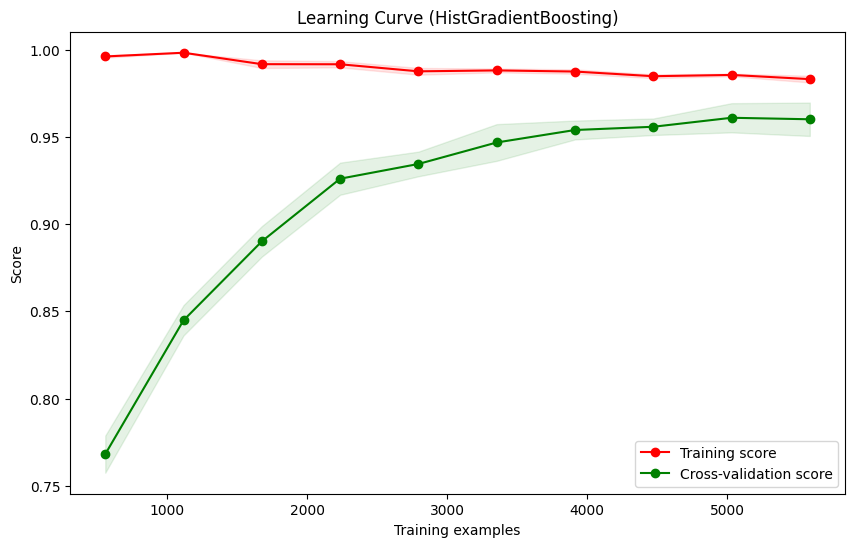

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9928469241773963, 0.9856938483547926, 0.9914163090128756, 0.994277539341917, 0.9914163090128756, 0.9885550786838341, 0.9914163090128756, 0.9957081545064378, 0.9928366762177651, 0.9842406876790831]
Mean accuracy: 0.9908407835999853
95% confidence interval: (0.9882310528308312, 0.9934505143691393)


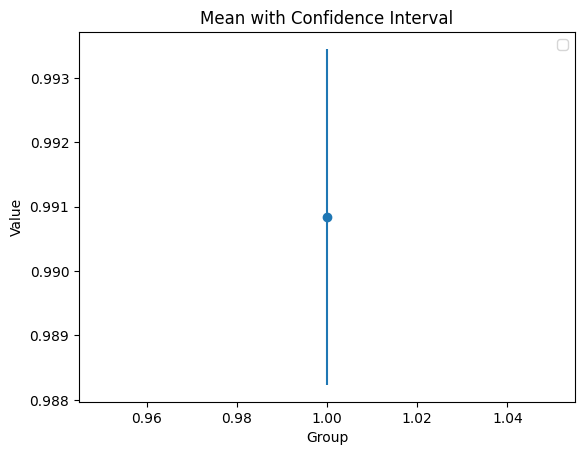

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


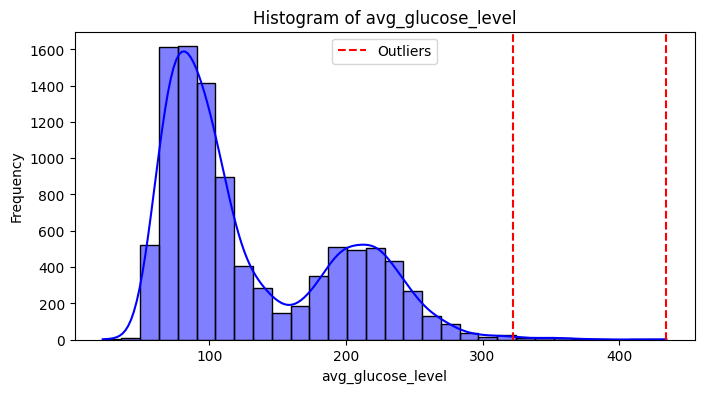

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3468
           1       0.96      0.96      0.96      3520

    accuracy                           0.96      6988
   macro avg       0.96      0.96      0.96      6988
weighted avg       0.96      0.96      0.96      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1524
           1       0.92      0.96      0.94      1472

    accuracy                           0.94      2996
   macro avg       0.94      0.94      0.94      2996
weighted avg       0.94      0.94      0.94      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4999
           1       0.96      0.99      0.98      4985

    accuracy                           0.97      9984


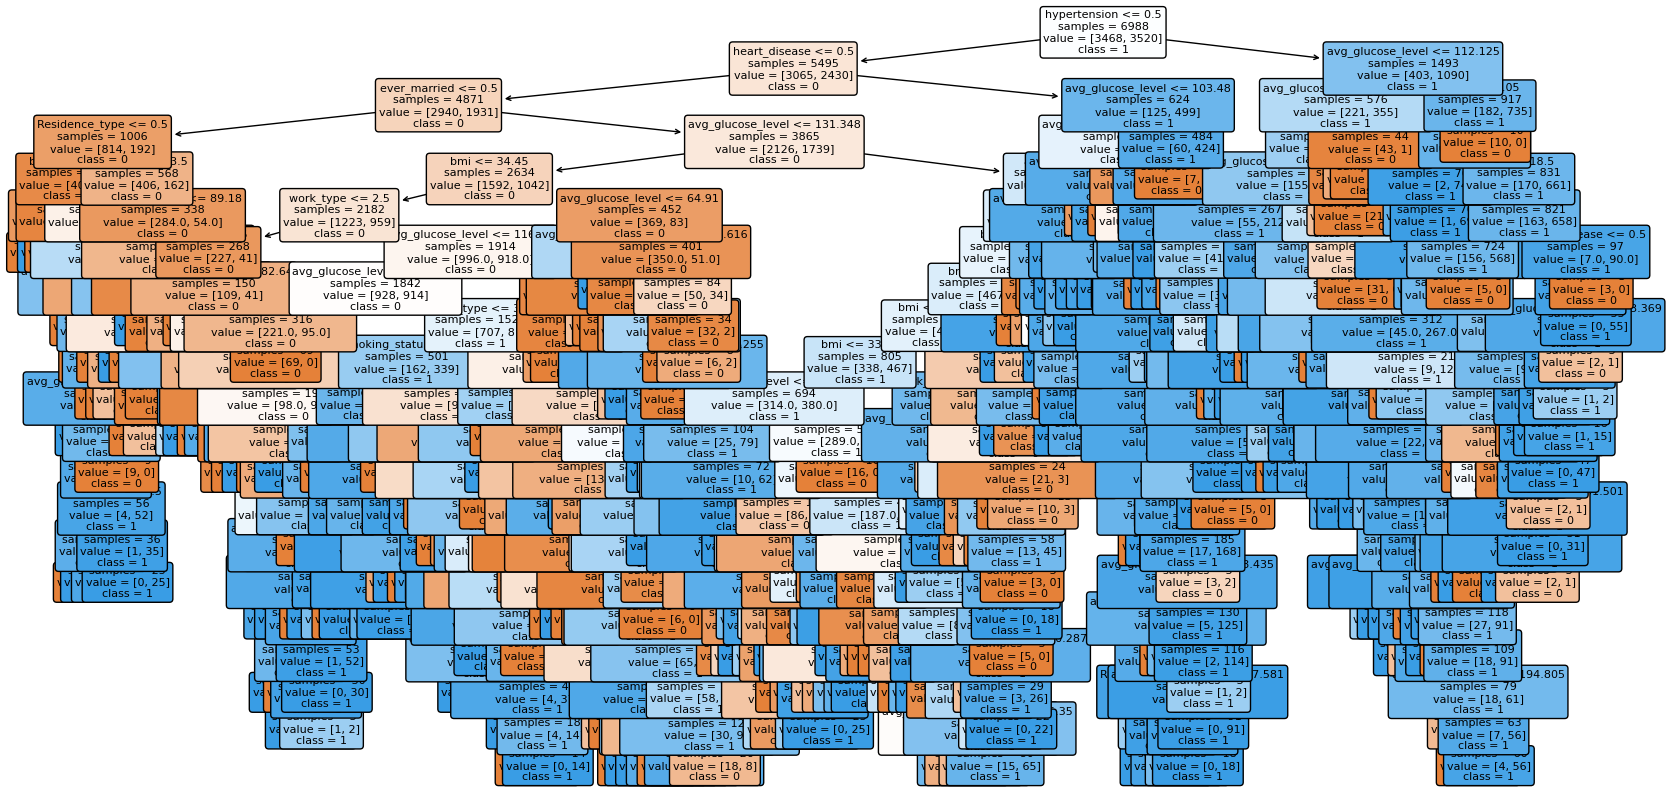

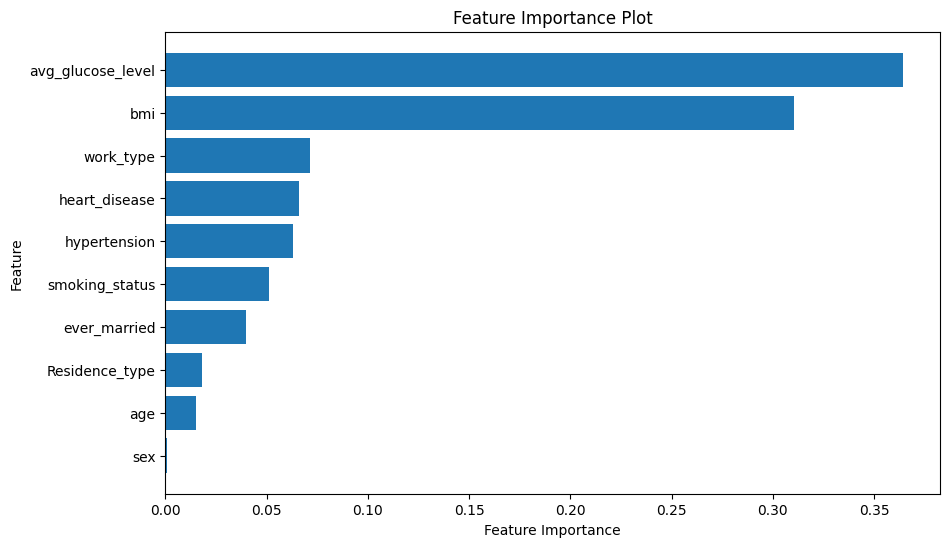

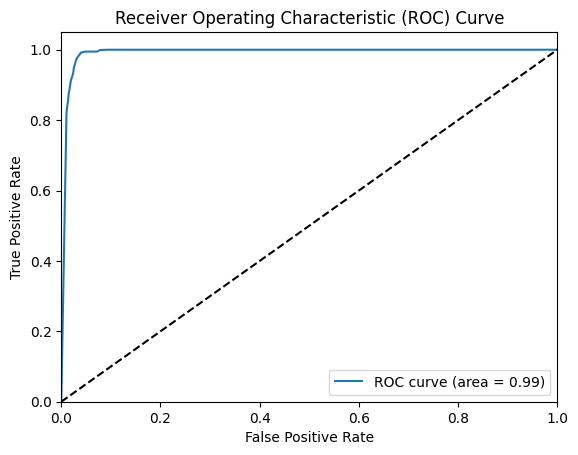

AUC Score: 0.991637745803925


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9213161659513591, 0.9141630901287554, 0.9041487839771102, 0.8884120171673819, 0.8726752503576538, 0.9141630901287554, 0.9227467811158798, 0.8984263233190272, 0.9097421203438395, 0.9154727793696275]
Mean accuracy: 0.906126640185939
95% confidence interval: (0.8948597954303888, 0.9173934849414892)


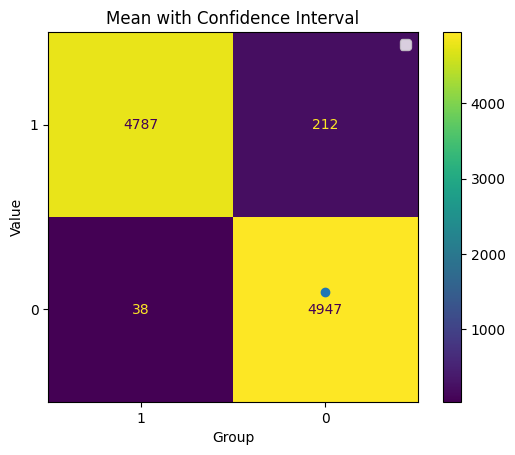

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)


**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 64.05054116249084
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.3, 'max_depth': 7, 'max_iter': 448, 'min_samples_leaf': 17}
Best score on training data:  0.9732954545454545
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      3520

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1524
           1       0.97      0.98      0.97      1472

    accuracy                           0.97      2996
   macro avg       0.97      0.98      0.97      2996
weighted avg       0.98      0.97      

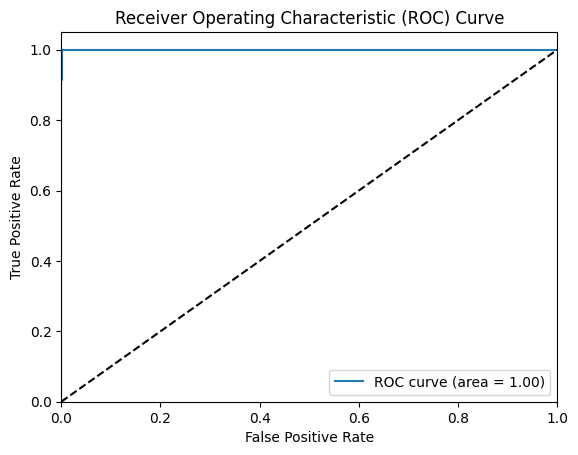

AUC Score: 0.9997326245590141


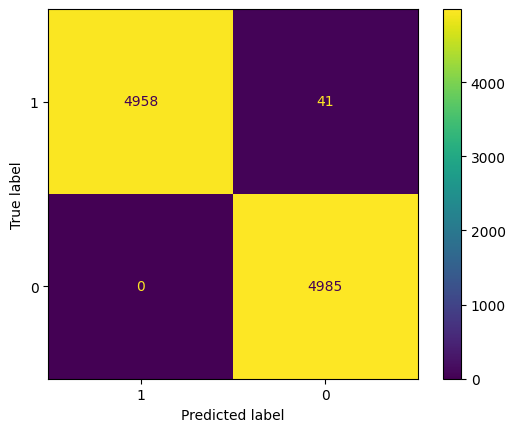

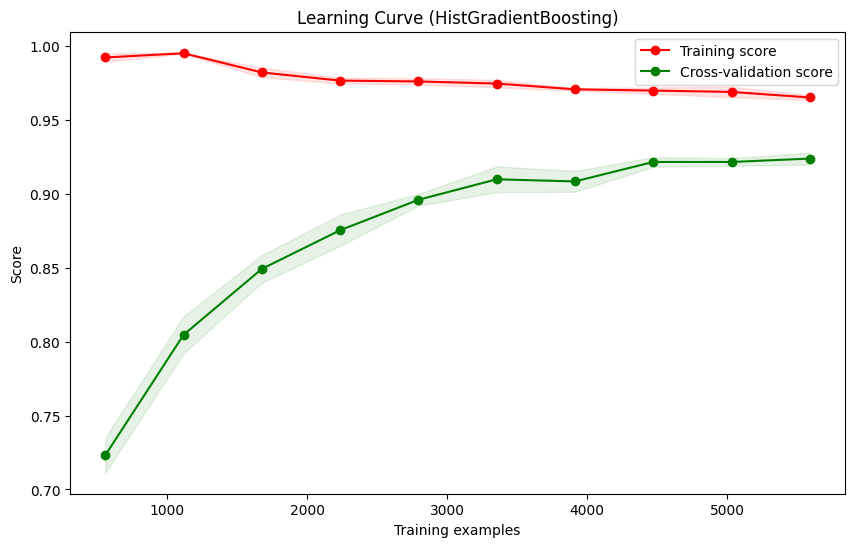

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9713876967095851, 0.9728183118741058, 0.9585121602288984, 0.9685264663805436, 0.9728183118741058, 0.9513590844062947, 0.9599427753934192, 0.9628040057224606, 0.9570200573065902, 0.9555873925501432]
Mean accuracy: 0.9630776262446146
95% confidence interval: (0.9574885939860847, 0.9686666585031445)


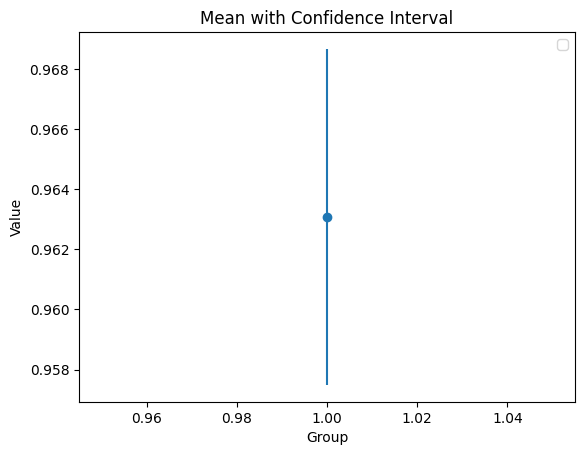

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

Outliers found:


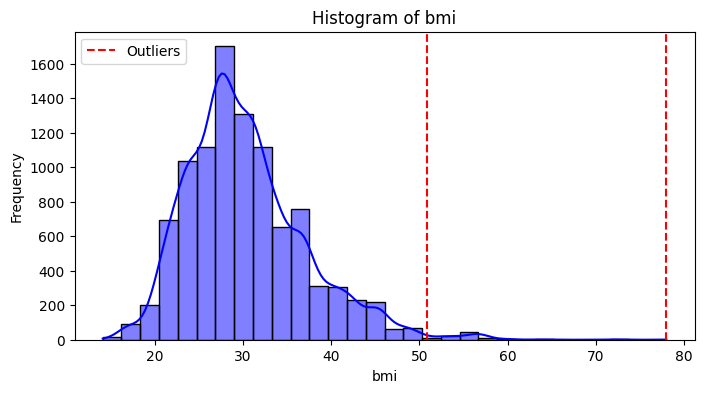

In [15]:
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


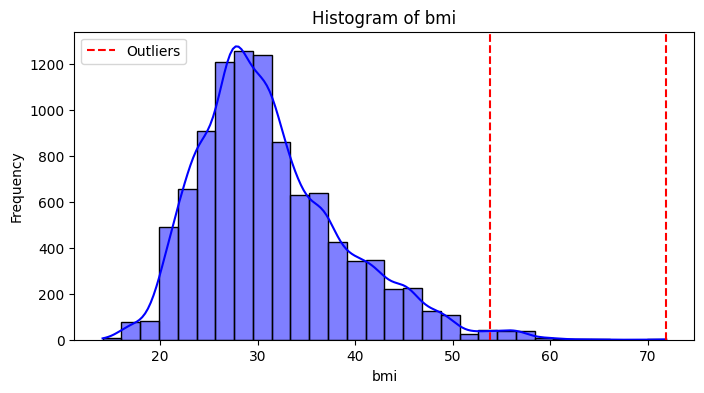

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3499
           1       0.95      0.97      0.96      3489

    accuracy                           0.96      6988
   macro avg       0.96      0.96      0.96      6988
weighted avg       0.96      0.96      0.96      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1512
           1       0.91      0.96      0.94      1484

    accuracy                           0.93      2996
   macro avg       0.94      0.94      0.93      2996
weighted avg       0.94      0.93      0.93      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4999
           1       0.94      0.99      0.97      4985

    accuracy                           0.97      9984


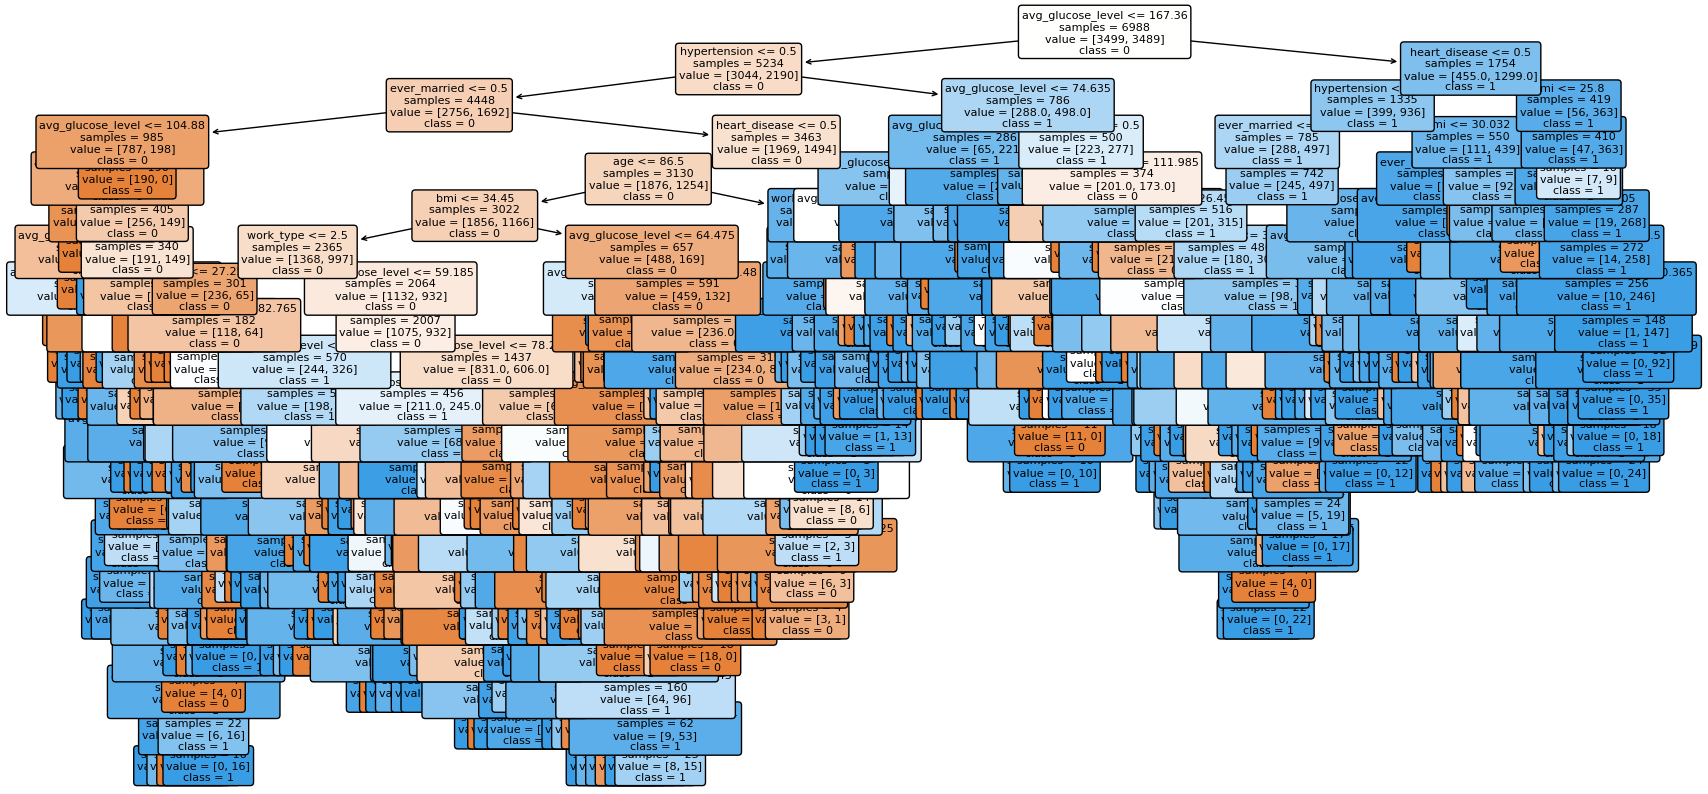

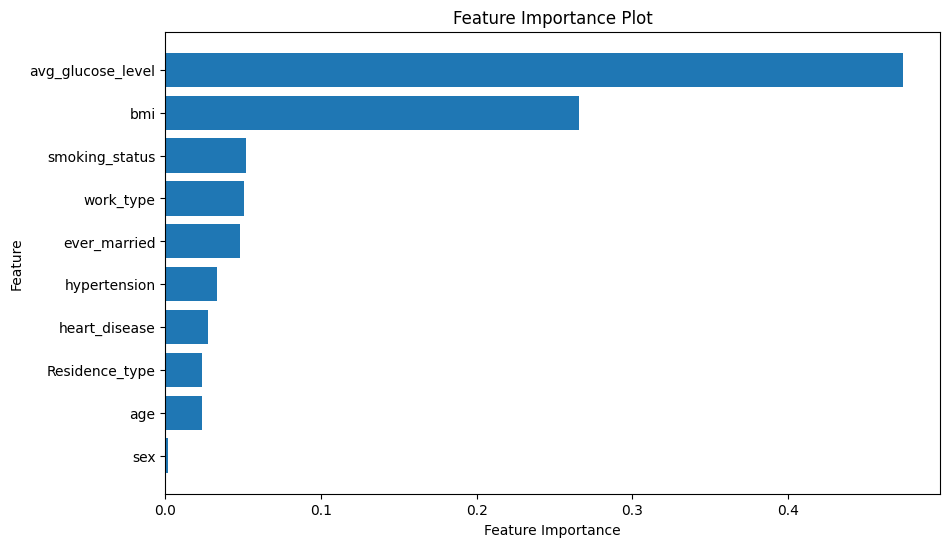

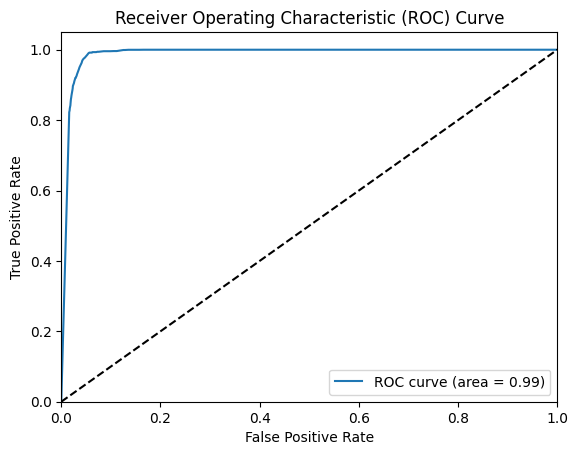

AUC Score: 0.9876738637597127


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9427753934191703, 0.9041487839771102, 0.9141630901287554, 0.927038626609442, 0.9227467811158798, 0.9427753934191703, 0.9041487839771102, 0.9356223175965666, 0.9312320916905444, 0.9197707736389685]
Mean accuracy: 0.9244422035572717
95% confidence interval: (0.9143141450782685, 0.9345702620362749)


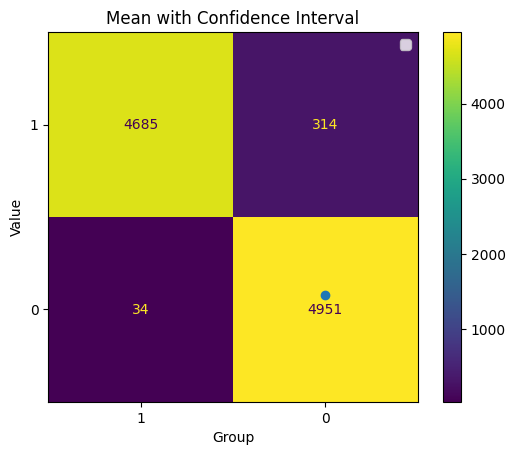

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 95.19462323188782
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.3, 'max_depth': 8, 'max_iter': 295, 'min_samples_leaf': 2}
Best score on training data:  0.9707650059814267
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3499
           1       1.00      1.00      1.00      3489

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1512
           1       0.97      0.97      0.97      1484

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0

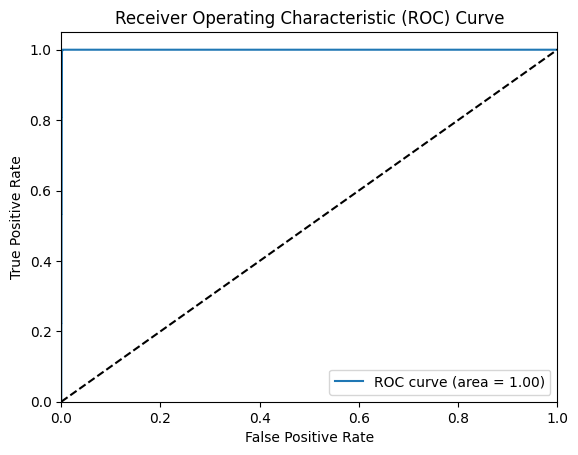

AUC Score: 0.9993620790356668


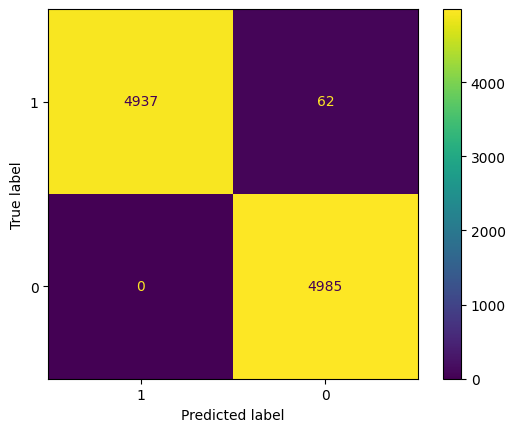

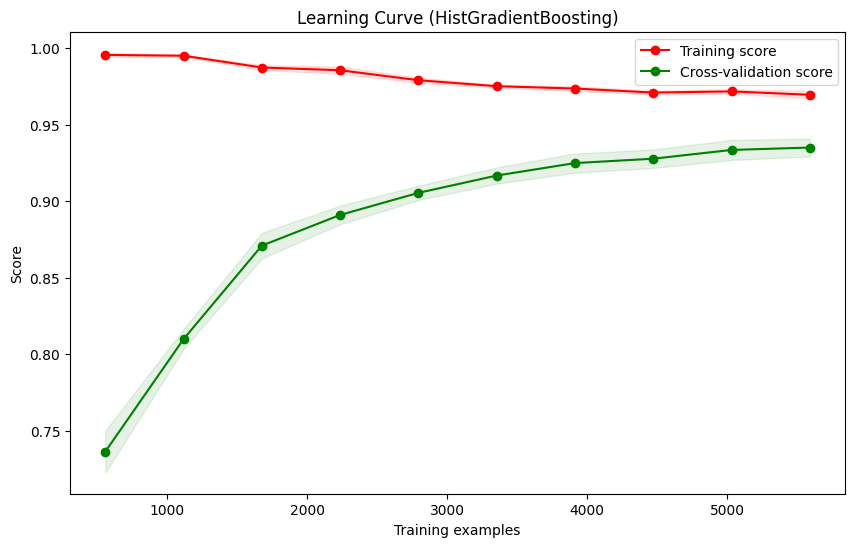

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9785407725321889, 0.9699570815450643, 0.9742489270386266, 0.9642346208869814, 0.9685264663805436, 0.9556509298998569, 0.9642346208869814, 0.9642346208869814, 0.9670487106017192, 0.9713467048710601]
Mean accuracy: 0.9678023455530005
95% confidence interval: (0.9632716715334456, 0.9723330195725554)


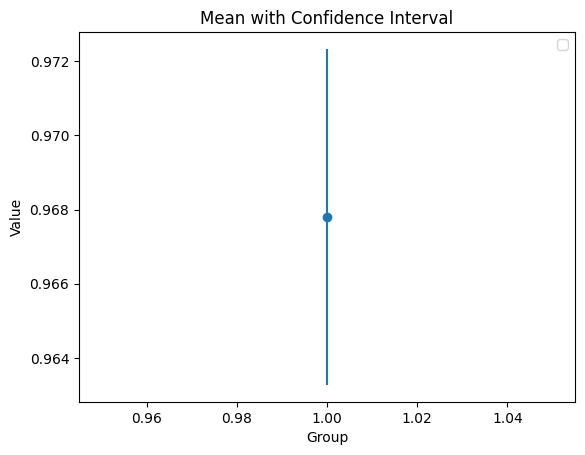

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')